# Predicting Car Prices

In [1]:
import pandas as pd
import numpy as np

#rename columns

cols = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels"
,"engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size"
,"fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]


cars = pd.read_csv("imports-85.data", names = cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.shape

(205, 26)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Determine which columns are numeric and can be used as features and which column is the target column.

In [4]:
# no missing values but there are '?' which needs replacing

cars.replace("?", np.nan, inplace = True)


cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Extract numerical columns and convert to float

numerical = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars_num = cars[numerical].astype('float')         
           

In [6]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


# Data Cleaning

In [7]:
# Only the normalized-losses column seems to have many missing values so we will drop the column entirely.

cars_num.drop(columns = "normalized-losses", inplace = True)


In [8]:
# drop rows with no price

cars_num.dropna(subset=['price'], inplace = True)

In [9]:
# fill np.nan with mean values

cars_num.fillna(cars_num.mean(), inplace = True)

In [10]:
cars_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null float64
highway-mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 23.6 KB


In [11]:
# Normalize all data except price column

price = cars_num["price"]

cars_norm = (cars_num - cars_num.min())/(cars_num.max() - cars_num.min())

cars_norm['price'] = price


In [12]:
cars_norm.head(50)

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


In [13]:
cars_norm.shape

(201, 14)

# Univariate Model

### Single k value

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(col, target, df):
    
    np.random.seed(1)
    knn = KNeighborsRegressor()
    
    #shuffle rows
    shuffle = np.random.permutation(df.index)
    shuffled = df.reindex(shuffle)
    

    #split into test and train sets
    split = int(len(shuffle)*0.75)
    train = shuffled.iloc[0:split]
    test = shuffled.iloc[split:]
    
    knn.fit(train[[col]], train[target])
    predicted = knn.predict(test[[col]])

    mse = mean_squared_error(predicted, test[target])
    rmse = np.sqrt(mse)   
    
    return rmse

In [15]:
# testing the function

knn_train_test("width","price", cars_norm)

3917.2276702270137

In [16]:
# test the univariate model on different coloumns

columns = cars_norm.columns.values.tolist()
columns.remove('price')

rmses = {}

for col in columns:
    rmses[col] = knn_train_test(col, 'price', cars_norm)
    
rmses
    

{'bore': 6507.421953431328,
 'city-mpg': 3684.803553760217,
 'compression-ratio': 5958.572328216569,
 'curb-weight': 4011.4500359082417,
 'engine-size': 3051.4342223507515,
 'height': 6666.667677627373,
 'highway-mpg': 4323.5025303792845,
 'horsepower': 4756.983755346181,
 'length': 5416.294063685402,
 'peak-rpm': 6326.47174389284,
 'stroke': 6939.6914399959405,
 'wheel-base': 4161.947971897813,
 'width': 3917.2276702270137}

In [17]:
list(rmses.values())

[5958.572328216569,
 3051.4342223507515,
 4011.4500359082417,
 6507.421953431328,
 6326.47174389284,
 5416.294063685402,
 3684.803553760217,
 6939.6914399959405,
 4161.947971897813,
 4323.5025303792845,
 6666.667677627373,
 4756.983755346181,
 3917.2276702270137]

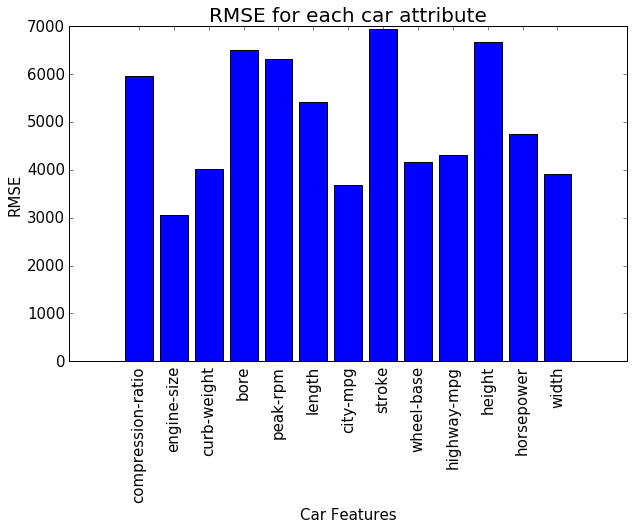

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(rmses)),list(rmses.values()), align = 'center')

plt.xticks(range(len(rmses)), list(rmses.keys()), rotation = 90, size = 15)
plt.yticks(size = 15)

plt.xlabel("Car Features", size = 15)
plt.ylabel("RMSE", size = 15)
plt.title("RMSE for each car attribute", size=20)

plt.show()

Feature, "engine size" performed the best using the default k value.

### Multiple k values

For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test_k(col, target, df):
    
    np.random.seed(1)
    
    #shuffle rows
    shuffle = np.random.permutation(df.index)
    shuffled = df.reindex(shuffle)
    
    #split into test and train sets
    split = int(len(shuffle)*0.75)
    train = shuffled.iloc[0:split]
    test = shuffled.iloc[split:]
    

    k_vals = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(k)
        knn.fit(train[[col]], train[target])
        predicted = knn.predict(test[[col]])
        
        mse = mean_squared_error(predicted, test[target])
        rmse = np.sqrt(mse)  
        
        k_rmse[k] = rmse
    
    return k_rmse

In [20]:
# testing the function

knn_train_test_k("height", "price", cars_norm)

{1: 8302.179086735921,
 3: 7159.369749588925,
 5: 6666.667677627373,
 7: 6570.390279532118,
 9: 6484.278955313533}

In [21]:
columns = cars_norm.columns.values.tolist()
columns.remove('price')

feature_k_rmses = {}

for col in columns:
    feature_k_rmses[col] = knn_train_test_k(col, "price", cars_norm)
    
feature_k_rmses

{'bore': {1: 8034.701162128302,
  3: 6084.362542715404,
  5: 6507.421953431328,
  7: 7053.551668716783,
  9: 7347.122881701951},
 'city-mpg': {1: 4403.50104473479,
  3: 4066.0079553304445,
  5: 3684.803553760217,
  7: 3751.3880442982118,
  9: 4114.050552842478},
 'compression-ratio': {1: 6357.71976018286,
  3: 5732.933869082801,
  5: 5958.572328216569,
  7: 5674.840084089771,
  9: 6218.363072593153},
 'curb-weight': {1: 3906.6625644092765,
  3: 4156.281651639599,
  5: 4011.4500359082417,
  7: 3811.5247071791855,
  9: 3914.8184777366964},
 'engine-size': {1: 2830.4032415548004,
  3: 2726.617989002506,
  5: 3051.4342223507515,
  7: 3009.8809966252047,
  9: 2951.5863108544913},
 'height': {1: 8302.179086735921,
  3: 7159.369749588925,
  5: 6666.667677627373,
  7: 6570.390279532118,
  9: 6484.278955313533},
 'highway-mpg': {1: 5033.224263848779,
  3: 4465.395966701448,
  5: 4323.5025303792845,
  7: 3902.7625529383477,
  9: 4249.080449511941},
 'horsepower': {1: 3554.321250115078,
  3: 4351

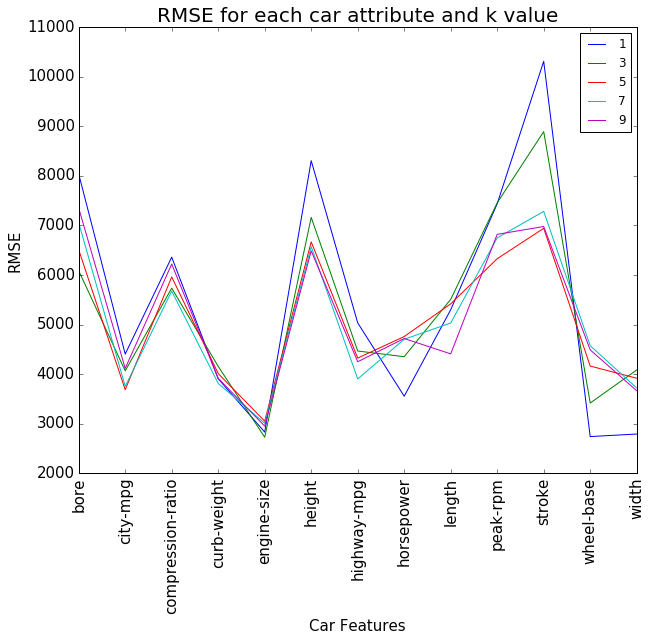

In [22]:
jack = pd.DataFrame(feature_k_rmses)
jacked = jack.transpose()
jacked.plot(figsize = (10,8))

plt.xticks(range(len(feature_k_rmses)), list(jacked.index), rotation = 90, size = 15)
plt.yticks(size = 15)

plt.xlabel("Car Features", size = 15)
plt.ylabel("RMSE", size = 15)
plt.title("RMSE for each car attribute and k value", size=20)

plt.show()

In [23]:
jack

,bore,city-mpg,compression-ratio,curb-weight,engine-size,height,highway-mpg,horsepower,length,peak-rpm,stroke,wheel-base,width
1,8034.701162,4403.501045,6357.719760,3906.662564,2830.403242,8302.179087,5033.224264,3554.321250,5297.150037,7434.706717,10305.511169,2740.625723,2791.733013
3,6084.362543,4066.007955,5732.933869,4156.281652,2726.617989,7159.369750,4465.395967,4351.006074,5507.625440,7452.988096,8888.386578,3417.144671,4083.105499
5,6507.421953,3684.803554,5958.572328,4011.450036,3051.434222,6666.667678,4323.502530,4756.983755,5416.294064,6326.471744,6939.691440,4161.947972,3917.227670
7,7053.551669,3751.388044,5674.840084,3811.524707,3009.880997,6570.390280,3902.762553,4701.796686,5030.583828,6746.235595,7280.853273,4572.080497,3722.033525
9,7347.122882,4114.050553,6218.363073,3914.818478,2951.586311,6484.278955,4249.080450,4717.573084,4407.827048,6817.364517,6975.780622,4488.496411,3665.167444


# Multivariate Model

In [24]:
# find the best features based on average rmse

avg_rmse = jack.mean()
avg_rmse_sort = avg_rmse.sort_values()
avg_rmse_sort

engine-size          2913.984552
width                3635.853430
wheel-base           3876.059055
curb-weight          3960.147487
city-mpg             4003.950230
highway-mpg          4394.793153
horsepower           4416.336170
length               5131.896083
compression-ratio    5988.485823
peak-rpm             6955.553334
bore                 7005.432042
height               7036.577150
stroke               8078.044616
dtype: float64

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_multiple(cols, target, df):
    
    np.random.seed(1)
    
    #shuffle rows
    shuffle = np.random.permutation(df.index)
    shuffled = df.reindex(shuffle)
    
    #split into test and train sets
    split = int(len(shuffle)*0.75)
    train = shuffled.iloc[0:split]
    test = shuffled.iloc[split:]
    

    k_vals = [5] 
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(k)
        knn.fit(train[cols], train[target])
        predicted = knn.predict(test[cols])
        
        mse = mean_squared_error(predicted, test[target])
        rmse = np.sqrt(mse)  
        
        k_rmse[k] = rmse
    
    return k_rmse


In [26]:
# testing the function

features2 = ["engine-size","height"]

knn_multiple(features2, "price", cars_norm)

{5: 2728.292959227903}

In [27]:
feature_list = list(avg_rmse_sort.index)

In [28]:
feature_list

['engine-size',
 'width',
 'wheel-base',
 'curb-weight',
 'city-mpg',
 'highway-mpg',
 'horsepower',
 'length',
 'compression-ratio',
 'peak-rpm',
 'bore',
 'height',
 'stroke']

In [35]:
multiple_rmse = {}

for x in range(2,7):
    features = feature_list[0:x]
    multiple_rmse['{} best features'.format(x)] = knn_multiple(features, "price", cars_norm)
    
multiple_rmse

{'2 best features': {5: 2638.287274194467},
 '3 best features': {5: 2634.3882310997487},
 '4 best features': {5: 2399.3737483588766},
 '5 best features': {5: 2543.664238540805},
 '6 best features': {5: 2537.1287147667767}}

# Hyperparameter testing

For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

* 4 best features
* 5 best features
* 6 best features

In [36]:
def knn_hyper(cols, target, df):
    
    np.random.seed(1)
    
    #shuffle rows
    shuffle = np.random.permutation(df.index)
    shuffled = df.reindex(shuffle)
    
    #split into test and train sets
    split = int(len(shuffle)*0.75)
    train = shuffled.iloc[0:split]
    test = shuffled.iloc[split:]
    

    k_vals = [x for x in range(1,26)]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(k)
        knn.fit(train[cols], train[target])
        predicted = knn.predict(test[cols])
        
        mse = mean_squared_error(predicted, test[target])
        rmse = np.sqrt(mse)  
        
        k_rmse[k] = rmse
    
    return k_rmse


In [37]:
top3_hyper_rmse = {}

top3 = [feature_list[0:4], feature_list[0:5], feature_list[0:6]]

for x in top3:
    top3_hyper_rmse['{} best features'.format(len(x))] = knn_hyper(x, "price", cars_norm)
    
top3_hyper_rmse

{'4 best features': {1: 2054.308886219402,
  2: 2312.1377161898145,
  3: 2342.6297026519737,
  4: 2297.287468833795,
  5: 2399.3737483588766,
  6: 2483.1128692111097,
  7: 2655.597307504255,
  8: 2753.481913222979,
  9: 2869.211518068187,
  10: 2876.2827368589724,
  11: 2790.066817576287,
  12: 2854.342162940999,
  13: 2847.3193772453174,
  14: 2946.704084275195,
  15: 3085.1710150725858,
  16: 3163.7708779795853,
  17: 3275.6480420821645,
  18: 3280.424683662215,
  19: 3316.979218424875,
  20: 3350.9084160485645,
  21: 3436.497390281892,
  22: 3472.0400792710466,
  23: 3535.9167710145994,
  24: 3569.44674285931,
  25: 3595.109623732075},
 '5 best features': {1: 2198.1608310621145,
  2: 2402.0308360333142,
  3: 2516.6052483524027,
  4: 2588.640862205569,
  5: 2543.664238540805,
  6: 2545.7763357011786,
  7: 2606.406501591917,
  8: 2815.318660567435,
  9: 2785.46102051866,
  10: 2771.8811967722586,
  11: 2729.3198095110683,
  12: 2794.67787774539,
  13: 2832.9760174697294,
  14: 2880.49

In [38]:
rob = pd.DataFrame(top3_hyper_rmse)
rob

,4 best features,5 best features,6 best features
1,2054.308886,2198.160831,2113.624055
2,2312.137716,2402.030836,2343.326711
3,2342.629703,2516.605248,2510.166020
4,2297.287469,2588.640862,2484.491191
5,2399.373748,2543.664239,2537.128715
6,2483.112869,2545.776336,2520.730726
7,2655.597308,2606.406502,2573.884855
8,2753.481913,2815.318661,2662.578452
9,2869.211518,2785.461021,2821.491390
10,2876.282737,2771.881197,2715.694788


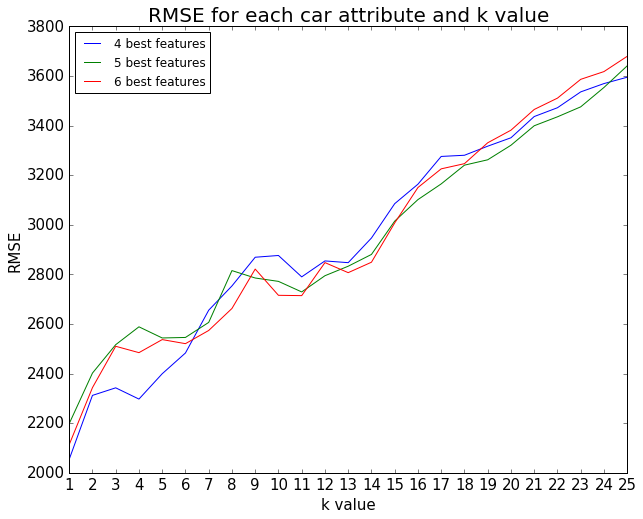

In [39]:
rob.plot(figsize = (10,8))

plt.xticks(range(1,26), rotation = 0, size = 15)
plt.yticks(size = 15)

plt.xlabel("k value", size = 15)
plt.ylabel("RMSE", size = 15)
plt.title("RMSE for each car attribute and k value", size=20)

plt.show()

Lowest rmse was with 4 features (**'engine-size',
'width', 'wheel-base', 'curb-weight'**) and a k value of 1.


# Cross Validation

Throughout this project we have used the 75-25 train and test method. Let's finish by using a different technique k-folds. 

- splitting the full dataset into k equal length partitions.
- selecting k-1 partitions as the training set and selecting the remaining partition as the test set
- training the model on the training set.
- using the trained model to predict labels on the test fold.
- computing the test fold's error metric.
- repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- calculating the mean of the k error values.

Below we are going to loop through 2-25 k folds to see which gives the lowest RMSE.

In [ ]:
def knn_hyper(cols, target, df):

    k_vals = [x for x in range(1,26)]
    k_rmse = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(k)
        knn.fit(train[cols], train[target])
        predicted = knn.predict(test[cols])
        
        mse = mean_squared_error(predicted, test[target])
        rmse = np.sqrt(mse)  
        
        k_rmse[k] = rmse
    
    return k_rmse


In [77]:
from sklearn.model_selection import cross_val_score, KFold

fold_avg_rmse = {}
fold_std_rmse = {}

def fold_stats(folds):

    num_folds = [x for x in range(2,folds +1)]

    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(1)
        mses = cross_val_score(model, cars_norm[feature_list[0:4]], cars_norm["price"], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
    
        avg_rmse = np.around(np.mean(rmses), decimals = 2)
        std_rmse = np.around(np.std(rmses), decimals = 2)
    
        fold_avg_rmse[fold] = avg_rmse
        fold_std_rmse[fold] = std_rmse
        
        print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
    


In [78]:
fold_stats(25)

2 folds:  avg RMSE:  3220.75 std RMSE:  229.76
3 folds:  avg RMSE:  2716.48 std RMSE:  347.15
4 folds:  avg RMSE:  2800.99 std RMSE:  508.54
5 folds:  avg RMSE:  2739.5 std RMSE:  393.43
6 folds:  avg RMSE:  2689.71 std RMSE:  417.58
7 folds:  avg RMSE:  2739.42 std RMSE:  432.29
8 folds:  avg RMSE:  2784.73 std RMSE:  544.84
9 folds:  avg RMSE:  2622.09 std RMSE:  460.97
10 folds:  avg RMSE:  2698.8 std RMSE:  646.76
11 folds:  avg RMSE:  2697.93 std RMSE:  689.95
12 folds:  avg RMSE:  2504.52 std RMSE:  836.53
13 folds:  avg RMSE:  2631.75 std RMSE:  795.38
14 folds:  avg RMSE:  2538.29 std RMSE:  878.83
15 folds:  avg RMSE:  2522.28 std RMSE:  891.43
16 folds:  avg RMSE:  2631.01 std RMSE:  1017.58
17 folds:  avg RMSE:  2510.54 std RMSE:  925.99
18 folds:  avg RMSE:  2475.63 std RMSE:  1042.93
19 folds:  avg RMSE:  2587.56 std RMSE:  782.96
20 folds:  avg RMSE:  2490.19 std RMSE:  937.46
21 folds:  avg RMSE:  2424.02 std RMSE:  996.27
22 folds:  avg RMSE:  2411.99 std RMSE:  1035.58

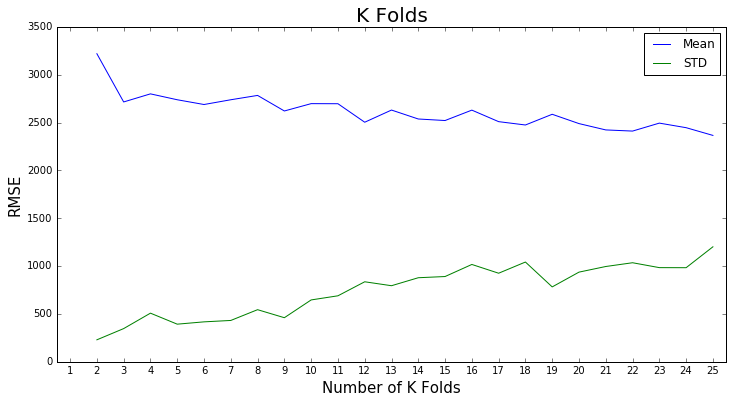

In [80]:
plt.figure(figsize=(12,6))

plt.plot(list(fold_avg_rmse.keys()), list(fold_avg_rmse.values()), label='Mean')
plt.plot(list(fold_std_rmse.keys()), list(fold_std_rmse.values()), label='STD')
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Folds", size=15)
plt.title("K Folds", size=20)

The best balance between bias vs variance would be using 3 or 6 folds.